In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as mp
import seaborn as sb
import plotly.express as pyx


In [3]:
sb.set_style('darkgrid')
sb.set(rc={'figure.figsize':(10,6)})


In [6]:
df=pd.read_csv("Data/games-data.csv")
df.head(10)

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364
5,Super Mario Galaxy,Wii,"November 12, 2007",97,9.0,Nintendo,"Action,Platformer,Platformer,3D,3D",No Online Multiplayer,73,3059
6,Super Mario Galaxy 2,Wii,"May 23, 2010",97,9.1,NintendoEADTokyo,"Action,Platformer,Platformer,3D,3D",No Online Multiplayer,87,2521
7,Red Dead Redemption 2,XboxOne,"October 26, 2018",97,7.8,RockstarGames,"Action Adventure,Open-World",Up to 32,33,3186
8,Grand Theft Auto V,XboxOne,"November 18, 2014",97,7.8,RockstarNorth,"Action Adventure,Modern,Open-World",Up to 30,14,1285
9,Grand Theft Auto V,PlayStation3,"September 17, 2013",97,8.3,RockstarNorth,"Modern,Action Adventure,Modern,Open-World",Up to 16,50,4568


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        17944 non-null  object
 1   platform    17944 non-null  object
 2   r-date      17944 non-null  object
 3   score       17944 non-null  int64 
 4   user score  17944 non-null  object
 5   developer   17944 non-null  object
 6   genre       17944 non-null  object
 7   players     17922 non-null  object
 8   critics     17944 non-null  int64 
 9   users       17944 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


In [6]:
def conv_year(x):
    dt=datetime.datetime.strptime(x,'%B %d, %Y' )
    return dt.year
def conv_date(x):
    dt=datetime.datetime.strptime(x,'%B %d, %Y' )
    return dt.day
def conv_month(x):
    dt=datetime.datetime.strptime(x,'%B %d, %Y' )
    return dt.month
def conv_day(x):
    dt=datetime.datetime.strptime(x,'%B %d, %Y' )
    return dt.weekday()
df['Year']=df['r-date'].apply(conv_year)
df['Date']=df['r-date'].apply(conv_date)
df['Month']=df['r-date'].apply(conv_month)
df['Day']=df['r-date'].apply(conv_day)

daymap={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
df['Day']=df['Day'].map(daymap)
df.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users,Year,Date,Month,Day
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,1998,23,11,Sunday
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,2000,20,9,Tuesday
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,2008,29,4,Monday
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324,1999,8,9,Tuesday
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,2008,29,4,Monday


In [7]:
df['user score']=df['user score'].apply(lambda x:0 if x=='tbd' else x)
df['user score']=pd.to_numeric(df['user score'])
df['user score']=df['user score']*10
df.head(500)

,name,platform,r-date,score,user score,developer,genre,players,critics,users,Year,Date,Month,Day
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,1998,23,11,Sunday
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,2000,20,9,Tuesday
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,2008,29,4,Monday
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85.0,Namco,"Action,Fighting,3D",1-2,24,324,1999,8,9,Tuesday
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,2008,29,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Viewtiful Joe,PlayStation2,"August 24, 2004",90,83.0,CloverStudio,"Action,Beat-'Em-Up",1 Player,34,47,2004,24,8,Monday
496,Madden NFL 2005,GameCube,"August 9, 2004",90,0.0,EATiburon,"Sports,Traditional,Football,Sim",1-4,26,0,2004,9,8,Sunday
497,Tiger Woods PGA Tour 2003,GameCube,"October 27, 2002",90,67.0,EASports,"Sports,Traditional,Golf,Sim",1-4,10,6,2002,27,10,Saturday
498,Freedom Force,PC,"March 24, 2002",90,77.0,IrrationalGames,"Role-Playing,Action RPG,Action RPG",1-4,27,87,2002,24,3,Saturday


In [8]:
fig = pyx.histogram(df, x="user score")
fig.show()

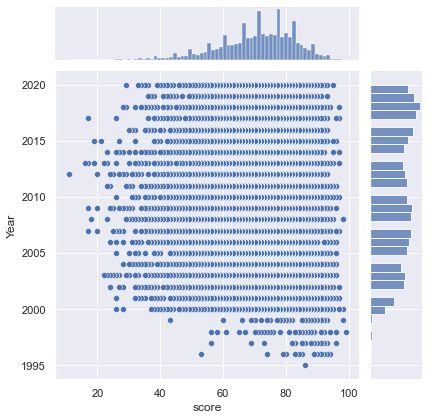

In [9]:
sb.jointplot(x=df['score'],y=df['Year'],kind='scatter')

In [10]:
df['score diff']=df['user score']-df['score']
df.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users,Year,Date,Month,Day,score diff
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,1998,23,11,Sunday,-8.0
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,2000,20,9,Tuesday,-24.0
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,2008,29,4,Monday,-22.0
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85.0,Namco,"Action,Fighting,3D",1-2,24,324,1999,8,9,Tuesday,-13.0
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,2008,29,4,Monday,-19.0


<AxesSubplot:ylabel='Frequency'>

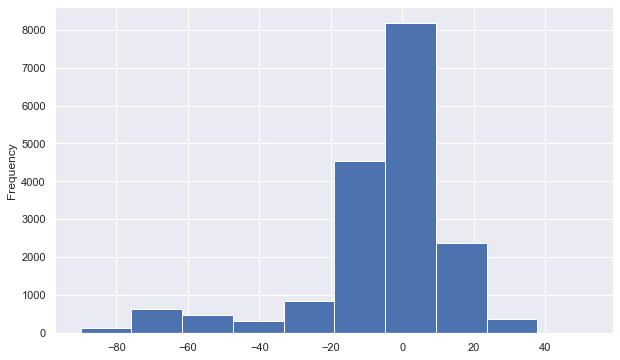

In [11]:
df['score diff'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

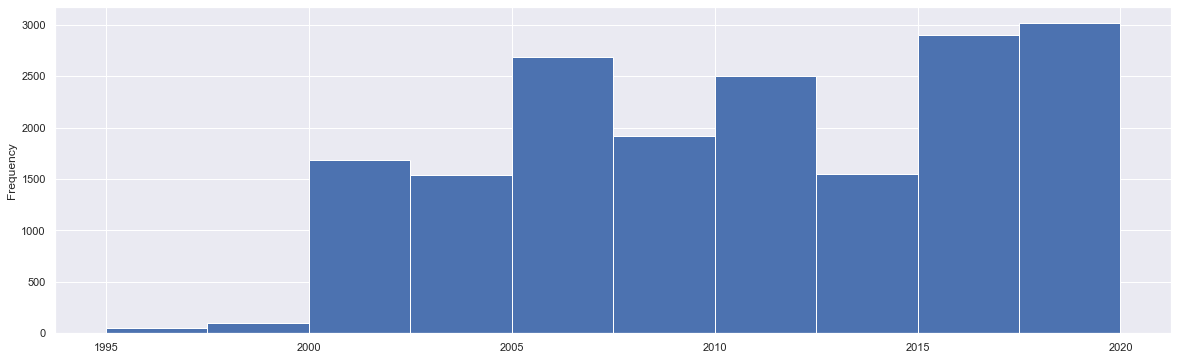

In [13]:
df['Year'].plot(kind='hist',figsize=(20,6))

In [ ]:
sb.jointplot()